## Fastai - Transforms.py playground

### Code

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from pathlib import Path
torch.cuda.set_device(0)

torch.backends.cudnn.benchmark=True

In [3]:
#PATH = Path('data/pill/classify')
PATH = Path('data/pill/classify/train')
PATH_TRN = PATH

In [4]:
#get images from directory dataset.py
fnames_full = read_dir(PATH, '00002-3228-30')

In [5]:
np.random.seed(42)
keep_pct = 1.
#keep_pct = 0.4
keeps = np.random.rand(len(fnames_full)) < keep_pct
fnames = np.array(fnames_full, copy=False)[keeps]
#label_arr = np.array(label_arr_full, copy=False)[keeps]

In [6]:
arch = dn201
sz_lr = 72
scale,bs = 2,2
# scale,bs = 4,32
sz_hr = sz_lr*scale

In [7]:
class MatchedFilesDataset(FilesDataset):
    def __init__(self, fnames, y, transform, path):
        self.y=y
        assert(len(fnames)==len(y))
        super().__init__(fnames, transform, path)
    def get_y(self, i): return open_image(os.path.join(self.path, self.y[i]))
    def get_c(self): return 0

In [8]:
val_idxs = get_cv_idxs(len(fnames), val_pct=min(0.5/keep_pct, 0.5))
((val_x,trn_x),(val_y,trn_y)) = split_by_idx(val_idxs, np.array(fnames), np.array(fnames))
len(val_x),len(trn_x)

(2, 3)

In [9]:
img_fn = PATH/'dc_test'/'1.JPEG'

In [10]:
aug_tfms = [RandomDihedral(tfm_y=TfmType.PIXEL)]

In [11]:
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)

In [12]:
denorm = md.val_ds.denorm

In [13]:
def show_img(ims, idx, figsize=(5,5), normed=True, ax=None):
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    if normed: ims = denorm(ims)
    else:      ims = np.rollaxis(to_np(ims),1,4)
    ax.imshow(np.clip(ims,0,1)[idx])
    ax.axis('off')

In [14]:
x,y = next(iter(md.val_dl))
x.size(),y.size()

(torch.Size([2, 3, 72, 72]), torch.Size([2, 3, 144, 144]))

### Test Image

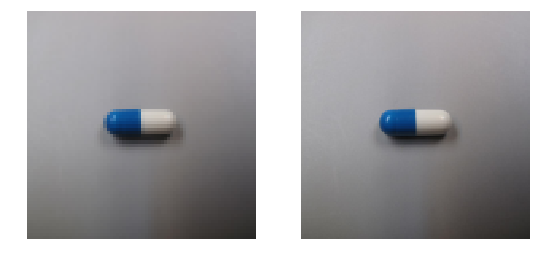

In [15]:
idx=1
fig,axes = plt.subplots(1, 2, figsize=(9,5))
show_img(x,idx, ax=axes[0])
show_img(y,idx, ax=axes[1])

### Random Rotate

In [16]:
aug_tfms = [RandomRotate(90)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

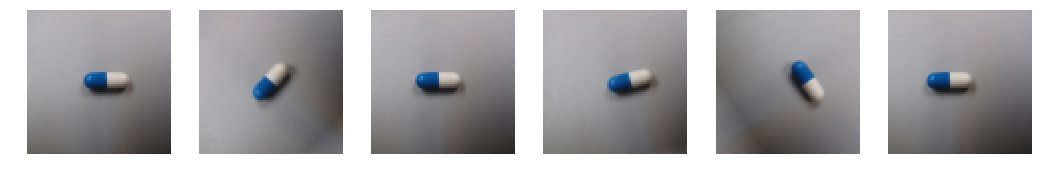

In [17]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

###  Lighting

In [18]:
aug_tfms = [RandomLighting(b=0, c=10, tfm_y=TfmType.NO)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

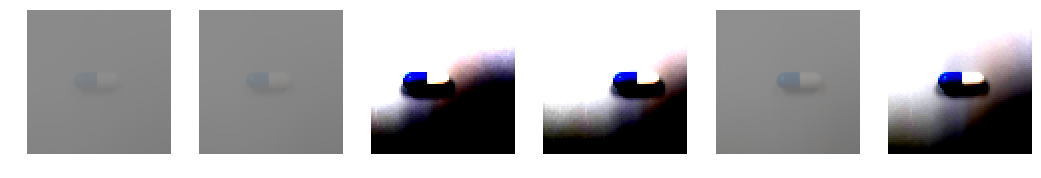

In [19]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### Zoom

In [20]:
aug_tfms = [RandomZoom(zoom_max=1)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

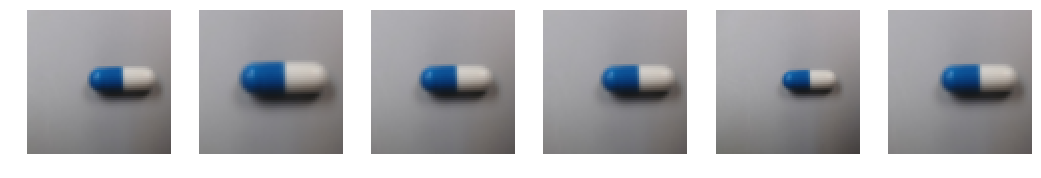

In [21]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### Stretch

In [22]:
aug_tfms = [RandomStretch(max_stretch=2, tfm_y=TfmType.NO)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

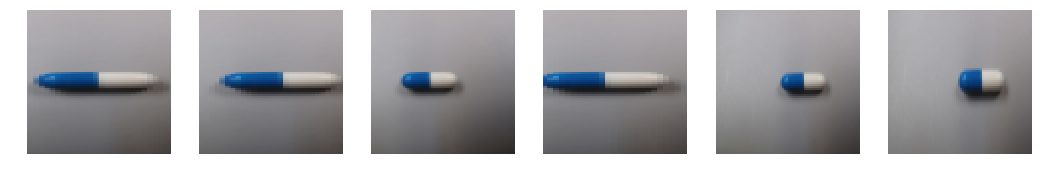

In [23]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### Dihedral

In [24]:
aug_tfms = [RandomDihedral()]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

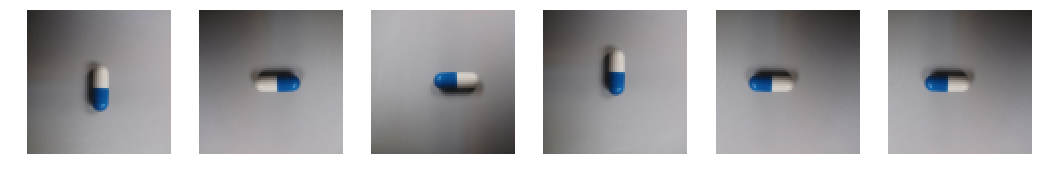

In [25]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### GoogleNetResize

In [26]:
aug_tfms = [GoogleNetResize(targ_sz=10)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

ValueError: all input arrays must have the same shape

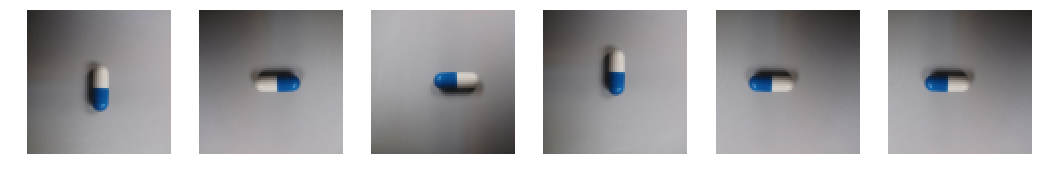

In [27]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### CutOut

In [28]:
aug_tfms = [Cutout(n_holes=10, length=20, tfm_y=TfmType.NO)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

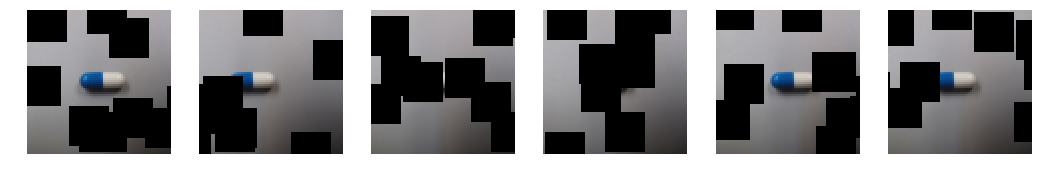

In [29]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### Padding

In [30]:
aug_tfms = [AddPadding(pad=10, mode=cv2.BORDER_REFLECT)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

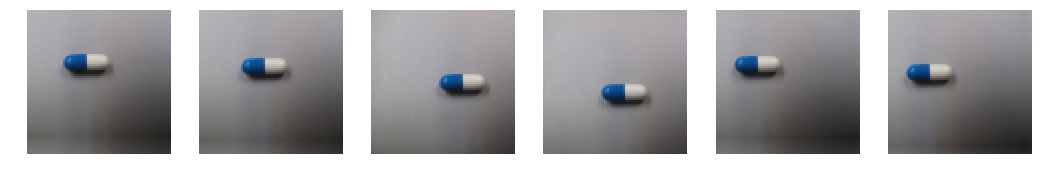

In [31]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### RandomRotateZoom

In [32]:
aug_tfms = [RandomRotateZoom(deg=20, zoom=5, stretch=0.5)]
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

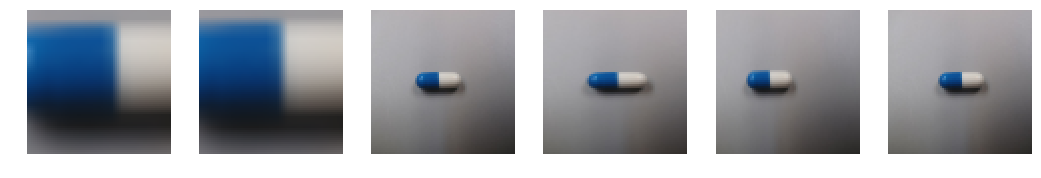

In [33]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### Transform_basic

In [34]:
aug_tfms = [RandomRotate(10), RandomLighting(0.05, 0.05)] #Transform basic
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

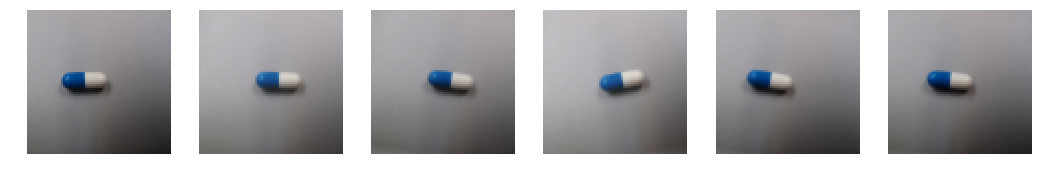

In [35]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### Transfrom_side_on

In [36]:
aug_tfms = transforms_basic + [RandomFlip()] #Transform_side_on
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

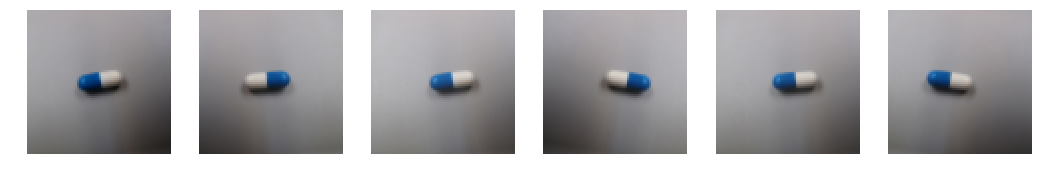

In [37]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])

### Transform_top_down 

In [38]:
aug_tfms = transforms_basic + [RandomDihedral()] #Transform_top_down
tfms = tfms_from_model(arch, sz_lr, tfm_y=TfmType.PIXEL, aug_tfms=aug_tfms, sz_y=sz_hr)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH_TRN)
md = ImageData(PATH, datasets, bs, num_workers=16, classes=None)
batches = [next(iter(md.aug_dl)) for i in range(6)]

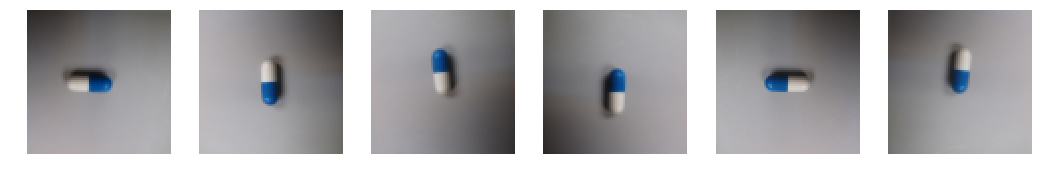

In [39]:
fig, axes = plt.subplots(1,6, figsize=(18,9))
for i,(x,y) in enumerate(batches):
    show_img(x,idx, ax=axes.flat[i])